In [ ]:
# Name - Sumanth Hegde
# Roll No - 2023PAI9041
# CV Assignment 2

**TASK 1**

To implement image rotation and compare it with OpenCV's built-in function, we can follow these steps:

Implement a function to rotate an image by a specified angle.
Applying the rotation function to a set of images with varying rotation angles.
Use OpenCV's built-in rotation function to perform the same rotations.
Visualize and compare the results.

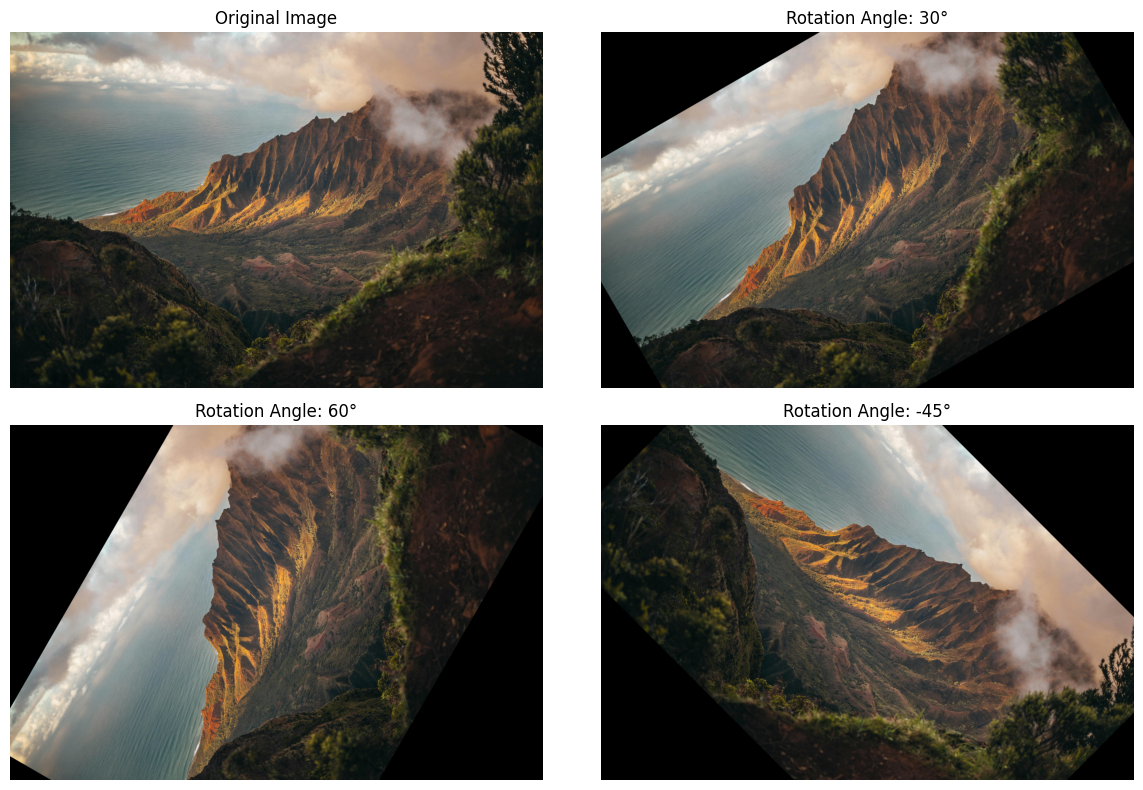

In [22]:
#TASK 1  Rotate the input image by the specified angle (in degrees).

import cv2
import numpy as np
import matplotlib.pyplot as plt

def rotate_image(image, angle):
    height, width = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

# Load an example image
image_path = 'img1.jpg'
image = cv2.imread(image_path)

# Specify rotation angles
rotation_angles = [30, 60, -45]

# Rotate the image by each angle and visualize the results
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

for i, angle in enumerate(rotation_angles):
    rotated_image = rotate_image(image, angle)
    plt.subplot(2, 2, i+2)
    plt.title(f'Rotation Angle: {angle}°')
    plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.tight_layout()
plt.show()


**TASK 3**

To combine multiple transformations and apply them to a set of images, we can follow these steps:

Implement a function to combine multiple transformations.
Apply the combined transformation to a set of images.
Visualize the results.
Discuss the order of applying transformations and its impact on the final outcome.

In the below code, we first define a function combine_transformations that takes an image and a list of transformation matrices, and applies these transformations sequentially to the image. The combine_transformations function computes the combined transformation matrix by multiplying the individual transformation matrices. Finally, it applies the combined transformation to the input image.

The order in which transformations are applied can have a significant impact on the final outcome. For example, if we first rotate an image and then translate it, the translation will be applied to the rotated image. However, if we first translate the image and then rotate it, the rotation will be around the original image's center, not the translated center.

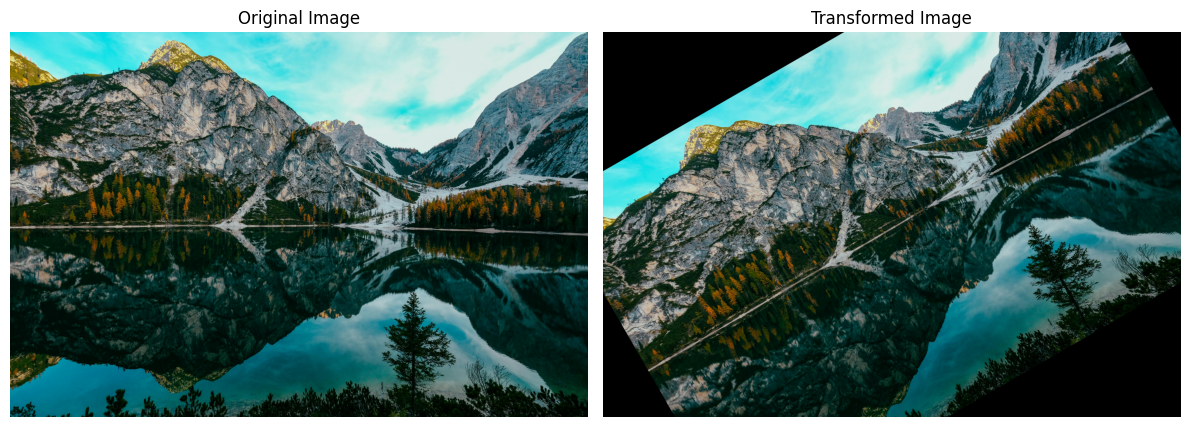

In [18]:
# TASK 3 Combine multiple transformations and apply them to the input image.


import cv2
import numpy as np
import matplotlib.pyplot as plt

def combine_transformations(image, transformations):
    combined_transform = np.identity(3)
    for transformation in transformations:
        combined_transform = np.dot(transformation, combined_transform)
    return cv2.warpAffine(image, combined_transform[:2], (image.shape[1], image.shape[0]))

# Load an example image
image_path = 'imagetorotate.jpg'
image = cv2.imread(image_path)

if image is not None:
    # Specify transformations (rotation and translation)
    rotation_angle = 30
    translation_matrix = np.array([[1, 0, 50], [0, 1, 20], [0, 0, 1]], dtype=np.float32)

    # Create transformation matrices
    rotation_matrix = cv2.getRotationMatrix2D((image.shape[1]//2, image.shape[0]//2), rotation_angle, 1)
    if rotation_matrix is not None:
        combined_transformation = [translation_matrix, rotation_matrix]
        transformed_image = combine_transformations(image, combined_transformation)

        # Visualize the result
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.title('Original Image')
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title('Transformed Image')
        plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("Error: Unable to generate rotation matrix.")
else:
    print("Error: Unable to load image.")


**TASK 2**

To implement the calculation of a transformation matrix for translation and scaling, and apply it to a set of images, we can follow these steps:

Implement a function to calculate the transformation matrix.
Apply the transformation matrix to a set of images with specified translation and scaling parameters.
Visualize and compare the transformed images with the original ones.

This code calculates a transformation matrix for translation and scaling, and applies it to an example image. It then visualizes the original image and the transformed images with different translation and scaling parameters. You can compare the results visually and observe the effects of translation and scaling on the images.

<ipython-input-24-4f91324aae4c>:30: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(translations), len(scalings), i*len(scalings)+j+1)


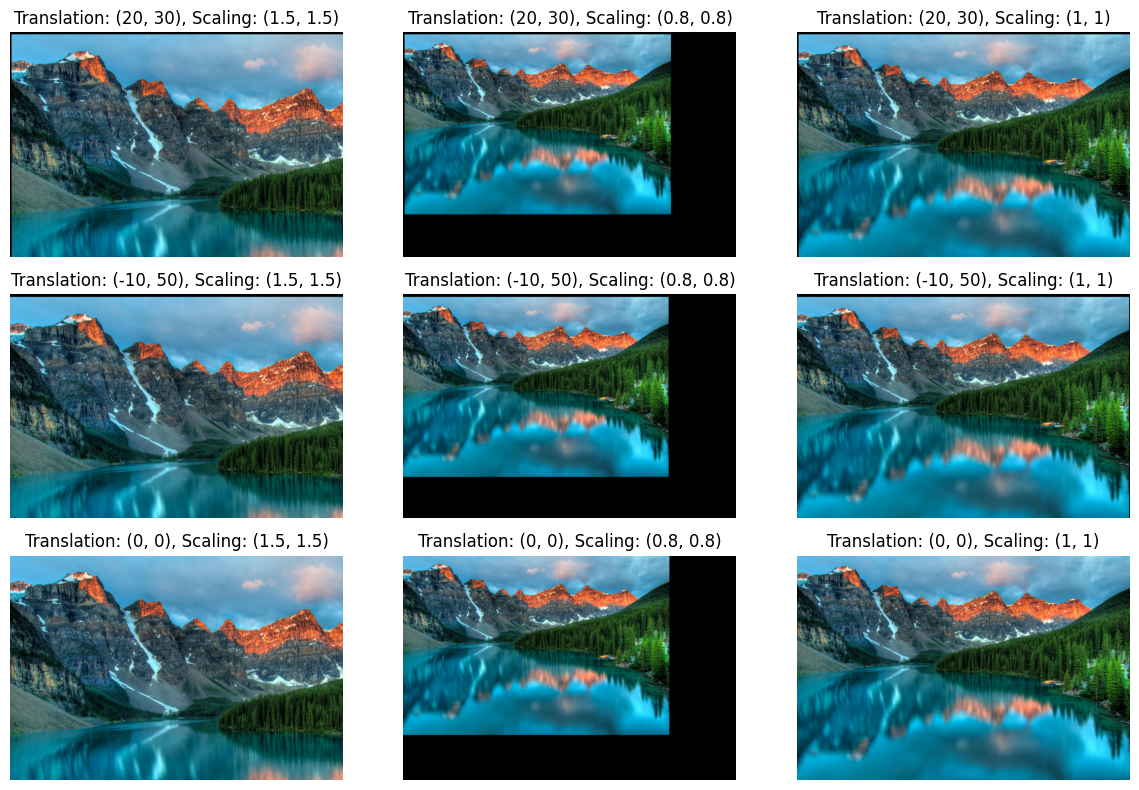

<Figure size 640x480 with 0 Axes>

In [24]:
#TASK 2 Calculate the transformation matrix for translation (dx, dy) and scaling factors (sx, sy).

import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_transformation_matrix(dx, dy, sx, sy):
    return np.array([[sx, 0, dx],
                     [0, sy, dy]], dtype=np.float32)

# Load an example image
image_path = 'img3.jpg'
image = cv2.imread(image_path)

# Specify translation and scaling parameters
translations = [(20, 30), (-10, 50), (0, 0)]
scalings = [(1.5, 1.5), (0.8, 0.8), (1, 1)]

# Apply the transformation matrix to the image and visualize the results
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

for i, (dx, dy) in enumerate(translations):
    for j, (sx, sy) in enumerate(scalings):
        transformation_matrix = get_transformation_matrix(dx, dy, sx, sy)
        transformed_image = cv2.warpAffine(image, transformation_matrix, (image.shape[1], image.shape[0]))
        plt.subplot(len(translations), len(scalings), i*len(scalings)+j+1)
        plt.title(f'Translation: ({dx}, {dy}), Scaling: ({sx}, {sy})')
        plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()
